<b> In this document, i explore the difference between Bora Bora and French Polynesia in GDELT and discover that when searching for French Polynesia that Bora Bora is already included. I also discover that explicitly stating the ActionGeo_ADM1Code instead of using the % predicates in the where clause was excluding a lot of articles. I also made a function to graph a time series report of all the articles that include actor 1 and the geo location. By chance, i stumbled across a unique discovery when comparing north korea and Guam where Guam all of a sudden one month had around 2500 articles written where actor 1 was North Korea when the average amount of articles written involving those two places was just a couple.</b>

Import all the stuff

In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 50)

df = pd.read_csv('C:/Users/dlili/OneDrive/Documents/CSUMB/UROC Fall 2020/All Oceania Events.csv')

import matplotlib.pyplot as plt
import seaborn as sns

# Import SQL stuff

import sqlalchemy
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)
df.to_sql('df', con=engine)

C:\Users\dlili\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3,4,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# Take a peek at the dataframe
df.head()

,GLOBALEVENTID,SQLDATE,MonthYear,Actor1Name,Actor1CountryCode,Actor2Name,Actor2CountryCode,EventCode,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,Actor1Geo_FullName,Actor1Geo_CountryCode,Actor2Geo_FullName,Actor2Geo_CountryCode,ActionGeo_FullName,ActionGeo_ADM1Code,SOURCEURL
0,948974965,20200927,202009,PHILIPPINE,PHL,RAIDER,NaN,173,-5.0,8,1,8,-3.900325,Philippines,RP,Samoa,WS,Samoa,WS,https://nationalinterest.org/blog/reboot/these...
1,948975139,20200927,202009,PUERTO RICO,USA,RAIDER,NaN,173,-5.0,2,1,2,-3.900325,Philippines,RP,Samoa,WS,Samoa,WS,https://nationalinterest.org/blog/reboot/these...
2,948975140,20200927,202009,PUERTO RICO,USA,RAIDER,NaN,173,-5.0,8,1,8,-3.900325,Puerto Rico,RQ,Samoa,WS,Samoa,WS,https://nationalinterest.org/blog/reboot/these...
3,948903418,20200927,202009,PALAU,PLW,TAIWAN,TWN,51,3.4,2,1,2,2.690583,Honduras,HO,Palau,PS,Palau,PS,https://taipeitimes.com/News/taiwan/archives/2...
4,948903425,20200927,202009,PARAGUAY,PRY,TAIWAN,TWN,51,3.4,2,1,2,2.690583,Honduras,HO,Palau,PS,Palau,PS,https://taipeitimes.com/News/taiwan/archives/2...


In [3]:
# Get some general info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351482 entries, 0 to 1351481
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   GLOBALEVENTID          1351482 non-null  int64  
 1   SQLDATE                1351482 non-null  int64  
 2   MonthYear              1351482 non-null  int64  
 3   Actor1Name             1196865 non-null  object 
 4   Actor1CountryCode      672281 non-null   object 
 5   Actor2Name             880521 non-null   object 
 6   Actor2CountryCode      524619 non-null   object 
 7   EventCode              1351482 non-null  int64  
 8   GoldsteinScale         1351481 non-null  float64
 9   NumMentions            1351482 non-null  int64  
 10  NumSources             1351482 non-null  int64  
 11  NumArticles            1351482 non-null  int64  
 12  AvgTone                1351482 non-null  float64
 13  Actor1Geo_FullName     1196383 non-null  object 
 14  Actor1Geo_CountryC

# Looking into Bora Bora vs. French Polynesia 

In [4]:
# This query shows that the ActionGeo_ADM1Code for French Polynesia does not contain Bora Bora
query = """
SELECT DISTINCT ActionGeo_FullName, ActionGeo_ADM1Code
FROM df
WHERE ActionGeo_ADM1Code like '%FP%'
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['ActionGeo_FullName','ActionGeo_ADM1Code'])
df2

,ActionGeo_FullName,ActionGeo_ADM1Code
0,"Bora Bora, French Polynesia (general), French ...",FP00
1,French Polynesia,FP


This Query done on BigQuery shows all the ActionGeo_FullNames under the ActionGeo_ADM1Code that contains 'FP'

SELECT ActionGeo_FullName, ActionGeo_ADM1Code, ActionGeo_ADM2Code, count(*) as count
FROM `gdelt-bq.gdeltv2.events` 
WHERE ActionGeo_ADM1Code like '%FP%'
GROUP BY ActionGeo_FullName, ActionGeo_ADM1Code, ActionGeo_ADM2Code

In [5]:
big_q_result = pd.read_csv('C:/Users/dlili/OneDrive/Documents/CSUMB/UROC Fall 2020/CSV Files/Investigating French Polynesia.csv')

big_q_result.head(50)

,ActionGeo_FullName,ActionGeo_ADM1Code,ActionGeo_ADM2Code,count
0,"Vaiete, French Polynesia (general), French Pol...",FP00,16355.0,14
1,"Northwest Passage, French Polynesia (general),...",FP00,16355.0,5
2,"Mataura, French Polynesia (general), French Po...",FP00,16355.0,1
3,"Tefana, French Polynesia (general), French Pol...",FP00,16355.0,111
4,"Polynesie Francaise, French Polynesia (general...",FP00,16355.0,21
5,"Papeete, French Polynesia (general), French Po...",FP00,16355.0,8752
6,"Tautira, French Polynesia (general), French Po...",FP00,16355.0,6
7,"Rautini, French Polynesia (general), French Po...",FP00,16355.0,4
8,"Tahuna, French Polynesia (general), French Pol...",FP00,16355.0,2
9,"Ua-Pu, French Polynesia (general), French Poly...",FP00,16355.0,1


In [6]:
# This is the total amount of events using the ActionGeo_ADM1Code that contains 'FP'

big_q_result['count'].sum()

26764

In [7]:
# This query counts all the events with the 
# ActionGeo_ADM1Code like '%FP%' and ActionGeo_FullName = 'Bora Bora, French Polynesia (general), French Polynesia'

query = """
SELECT count(*) as count
FROM df
WHERE ActionGeo_ADM1Code like '%FP%' and ActionGeo_FullName = 'Bora Bora, French Polynesia (general), French Polynesia'
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['count'])
df2

,count
0,1306


After seeing that there is a lot of article we are loosing out on from explicitly specifying the ActionGeo_ADM1Code, i wanted to change all the ActionGeo_ADM1Code's from explicitly filtering the code to containing the code on BigQuery. 

# Re-Do the Events Table Query Pull Again

SELECT 
  GLOBALEVENTID, SQLDATE, MonthYear, Actor1Name, Actor1CountryCode, Actor2Name, Actor2CountryCode, EventCode, GoldsteinScale, NumMentions, NumSources, NumArticles, AvgTone, Actor1Geo_FullName, Actor1Geo_CountryCode, Actor2Geo_FullName, Actor2Geo_CountryCode ,ActionGeo_FullName, ActionGeo_ADM1Code, ActionGeo_ADM2Code, SOURCEURL
FROM 
  `gdelt-bq.gdeltv2.events` 
WHERE 
  ActionGeo_ADM1Code like 'FM%' -- Micronesia
  OR ActionGeo_ADM1Code like 'FJ%' -- Fiji
  OR ActionGeo_ADM1Code like 'KR%' -- Kiribati
  OR ActionGeo_ADM1Code like 'RM%' -- Marshall Islands
  OR ActionGeo_ADM1Code like 'NR%' -- Nauru
  OR ActionGeo_ADM1Code like 'PS%' -- Palau
  OR ActionGeo_ADM1Code like 'PP%' -- Papua New Guinea
  OR ActionGeo_ADM1Code like 'WS%' -- Samoa
  OR ActionGeo_ADM1Code like 'BP%' -- Solomon Islands
  OR ActionGeo_ADM1Code like 'TN%' -- Tonga
  OR ActionGeo_ADM1Code like 'TV%' -- Tuvalu
  OR ActionGeo_ADM1Code like 'NH%' -- Vanuatu
  OR ActionGeo_ADM1Code like 'CW%' -- Cook Islands
  OR ActionGeo_ADM1Code like 'NE%' -- Niue
  OR ActionGeo_ADM1Code like 'AQ%' -- American Samoa
  OR ActionGeo_FullName = 'Ashmore Reef, Queensland, Australia'
  OR ActionGeo_ADM1Code like 'FQ%' -- Baker Island
  OR ActionGeo_FullName = 'Coral Sea, Oceans (general), Oceans'
  OR ActionGeo_FullName like 'Easter Island, V%'
  OR ActionGeo_FullName = 'Galapagos, Imbabura, Ecuador'
  OR ActionGeo_ADM1Code like 'FP%' -- French Polynesia
  OR ActionGeo_ADM1Code like 'GQ%' -- Guam
  OR ActionGeo_ADM1Code like 'HQ%' -- Howland Island
  OR ActionGeo_ADM1Code like 'DQ%' -- Jarvis Island
  OR ActionGeo_ADM1Code like 'JQ%' -- Johnston Atoll
  OR ActionGeo_ADM1Code like 'KQ%' -- Kingman Reef
  OR ActionGeo_FullName = 'Midway Island, Western Australia, Australia'
  OR ActionGeo_ADM1Code like 'NC%' -- New Caledonia
  OR ActionGeo_ADM1Code like 'NF%' -- Norfold Island
  OR ActionGeo_ADM1Code like 'CQ%' -- Norther Mariana Islands
  OR ActionGeo_FullName = 'Ogasawaramura, Tokyo, Japan'
  OR ActionGeo_ADM1Code like 'LQ%' -- Palmyra Atoll
  OR ActionGeo_ADM1Code = 'ID36' -- Papua, Indonesia
  OR ActionGeo_ADM1Code like 'PC%' -- Pitcairn Islands
  OR ActionGeo_ADM1Code like 'TL%' -- Tokelau
  OR ActionGeo_ADM1Code like 'WQ%' -- Wake Island
  OR ActionGeo_ADM1Code like 'WF%' -- Wallis and Futuna
  OR ActionGeo_ADM1Code = 'ID30' -- Barat, Indonesia
  OR ActionGeo_FullName = 'Bonin Islands, Tokyo, Japan'

In [8]:
# Import the new data
df = pd.read_csv('C:/Users/dlili/OneDrive/Documents/CSUMB/UROC Fall 2020/CSV Files/Events_Table_Results.csv')

df.head()

engine = create_engine('sqlite://', echo=False)
df.to_sql('df', con=engine)

In [9]:
# This is the new dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913328 entries, 0 to 1913327
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   GLOBALEVENTID          int64  
 1   SQLDATE                int64  
 2   MonthYear              int64  
 3   Actor1Name             object 
 4   Actor1CountryCode      object 
 5   Actor2Name             object 
 6   Actor2CountryCode      object 
 7   EventCode              int64  
 8   GoldsteinScale         float64
 9   NumMentions            int64  
 10  NumSources             int64  
 11  NumArticles            int64  
 12  AvgTone                float64
 13  Actor1Geo_FullName     object 
 14  Actor1Geo_CountryCode  object 
 15  Actor2Geo_FullName     object 
 16  Actor2Geo_CountryCode  object 
 17  ActionGeo_FullName     object 
 18  ActionGeo_ADM1Code     object 
 19  ActionGeo_ADM2Code     float64
 20  SOURCEURL              object 
dtypes: float64(3), int64(7), object(11)
memory usage: 306.

In [28]:
def num_of_events_by_month(ActionGeo_FullName, Actor1):
    # Count the number of Events each month since 2015, where the parameters of ActionLocation and the Actor1
    query = """
    SELECT DISTINCT SUBSTR(CAST(dt.date as varchar),1,6) as yearMonth , count(*) as count
    FROM 
    (SELECT DISTINCT SQLDATE as date
    FROM df
    WHERE SQLDATE > 20150000) dt left join df on dt.date = df.SQLDATE
    WHERE Actor1Geo_FullName like '%"""+str(Actor1)+"""%' and ActionGeo_FullName like '%"""+ str(ActionGeo_FullName) +"""%'
    GROUP BY yearMonth
    """
    
    # Execute the query and save the result
    temp_result = engine.execute(query).fetchall()
    # Convert result into numpy array
    temp1 = np.array(temp_result)
    # Convert np array into dataframe
    df2 = pd.DataFrame(data=temp1, columns=['yearMonth','count'])
    # Convert the datatypes from Object 
    df2 = df2.convert_dtypes()
    df2['yearMonth'] = df2['yearMonth'].astype(int)
    df2['count'] = df2['count'].astype(int)
    # Show the result
    df2
    
    temp_array = pd.Series(np.array(df2['count']), index = np.array(df2['yearMonth']))
    
    plt.figure(figsize=(50,8))
    temp_array.plot.bar()
    plt.ylabel(str(Actor1) + " Events")
    plt.xlabel(str(ActionGeo_FullName) + " Events")
    plt.title("Number of events that " +str(Actor1)+ " has performed on in the location of "+ str(ActionGeo_FullName))

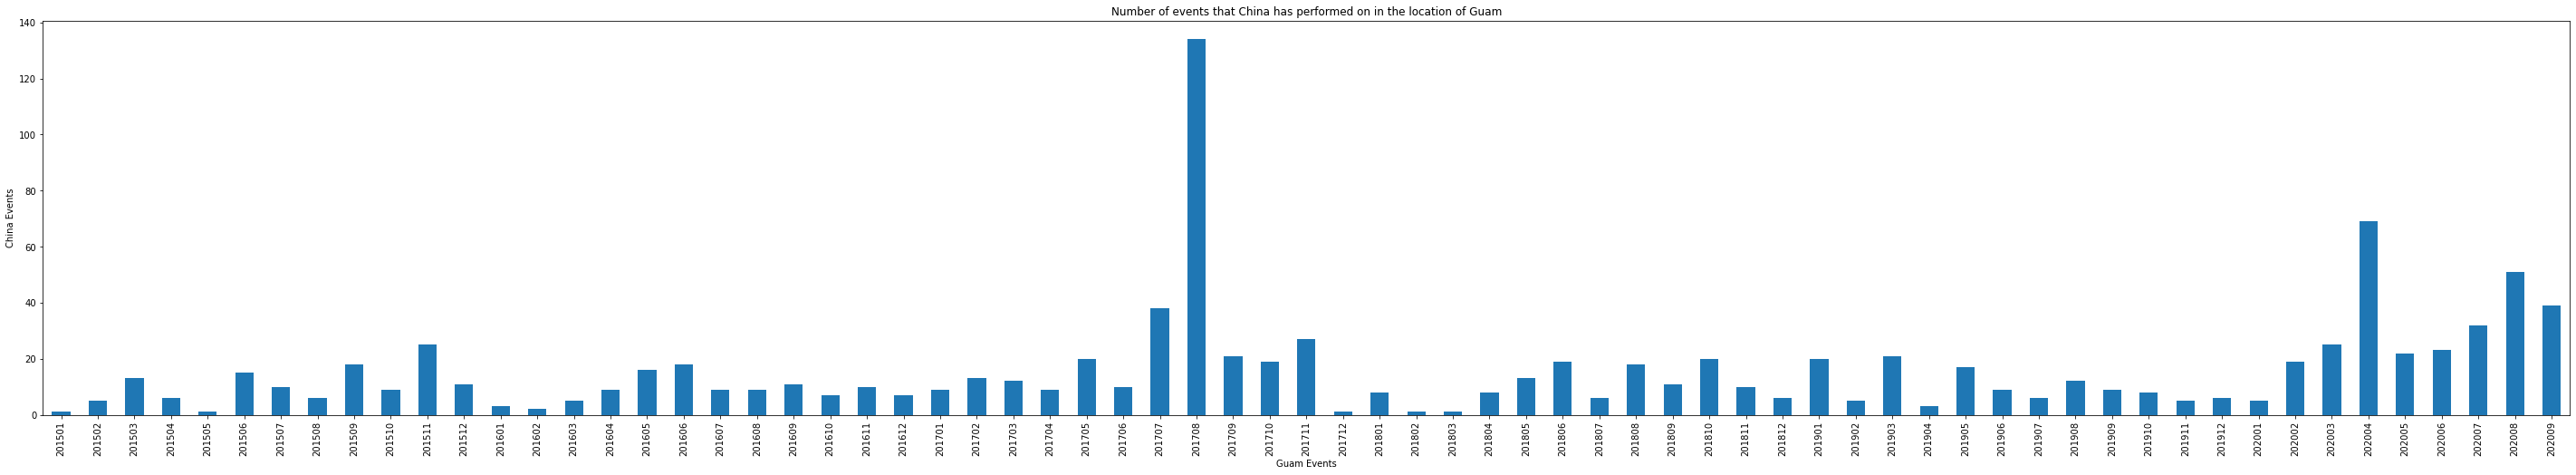

In [29]:
num_of_events_by_month('Guam', 'China')

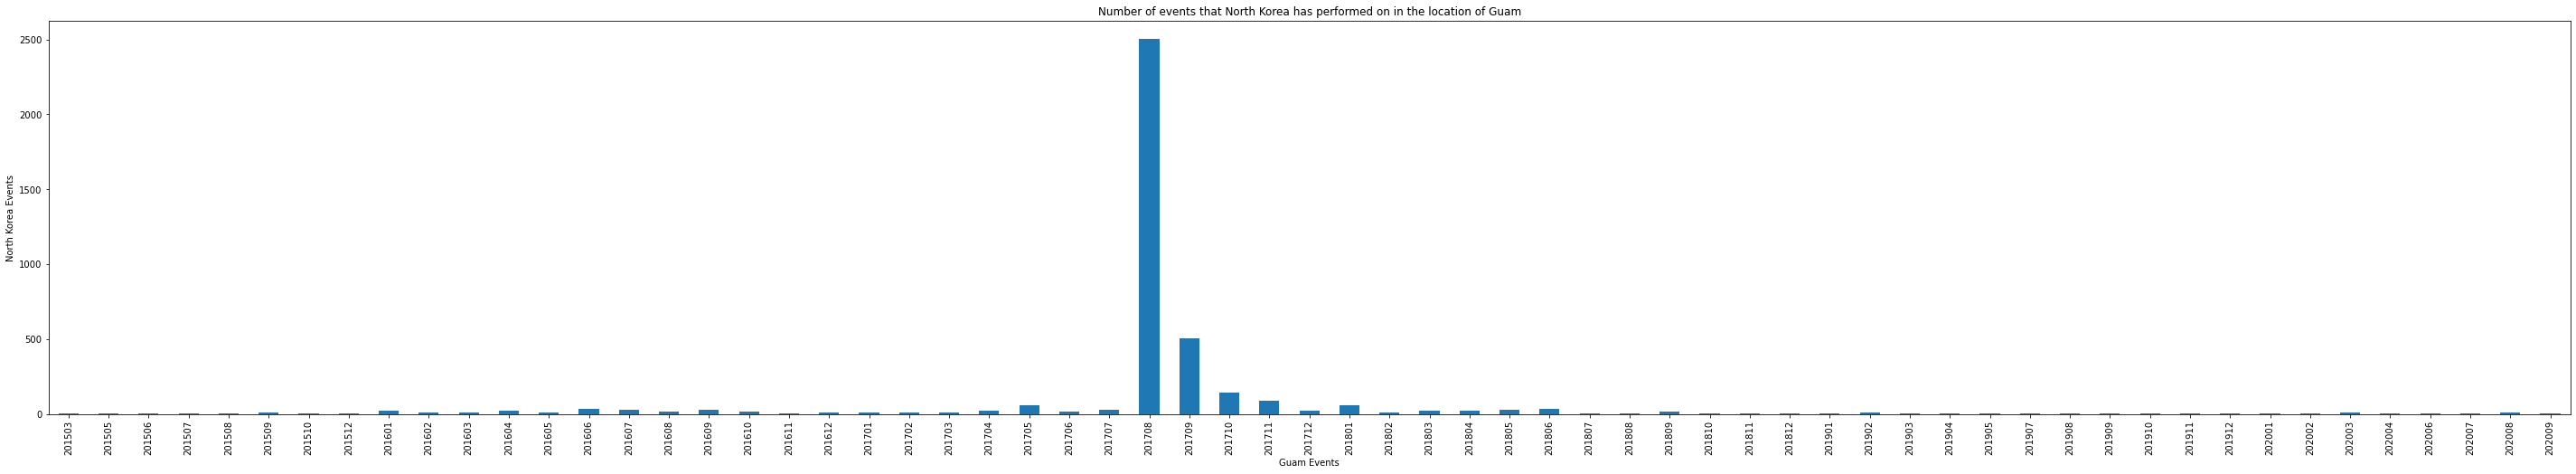

In [30]:
num_of_events_by_month('Guam', 'North Korea')

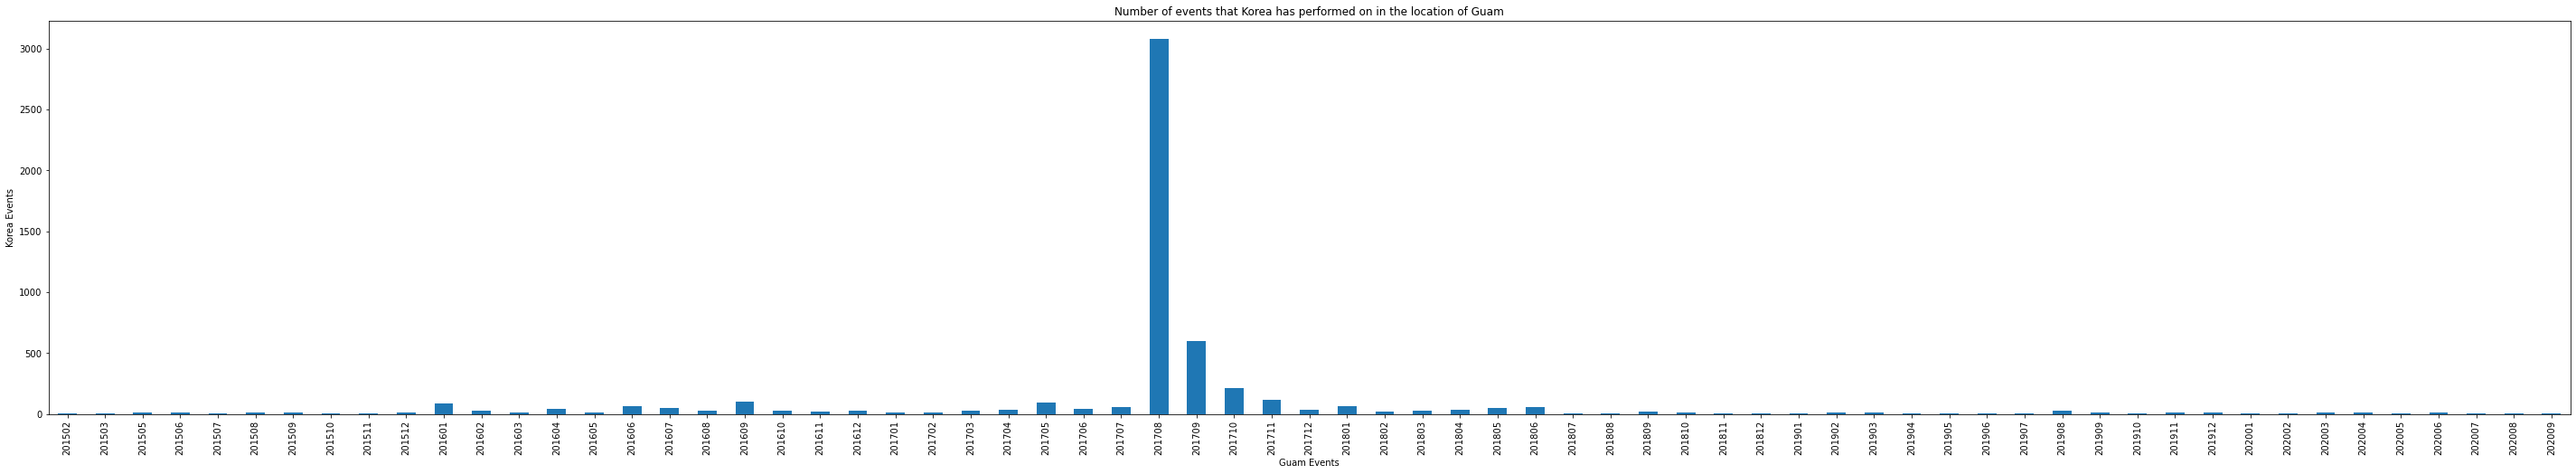

In [31]:
num_of_events_by_month('Guam', 'Korea')

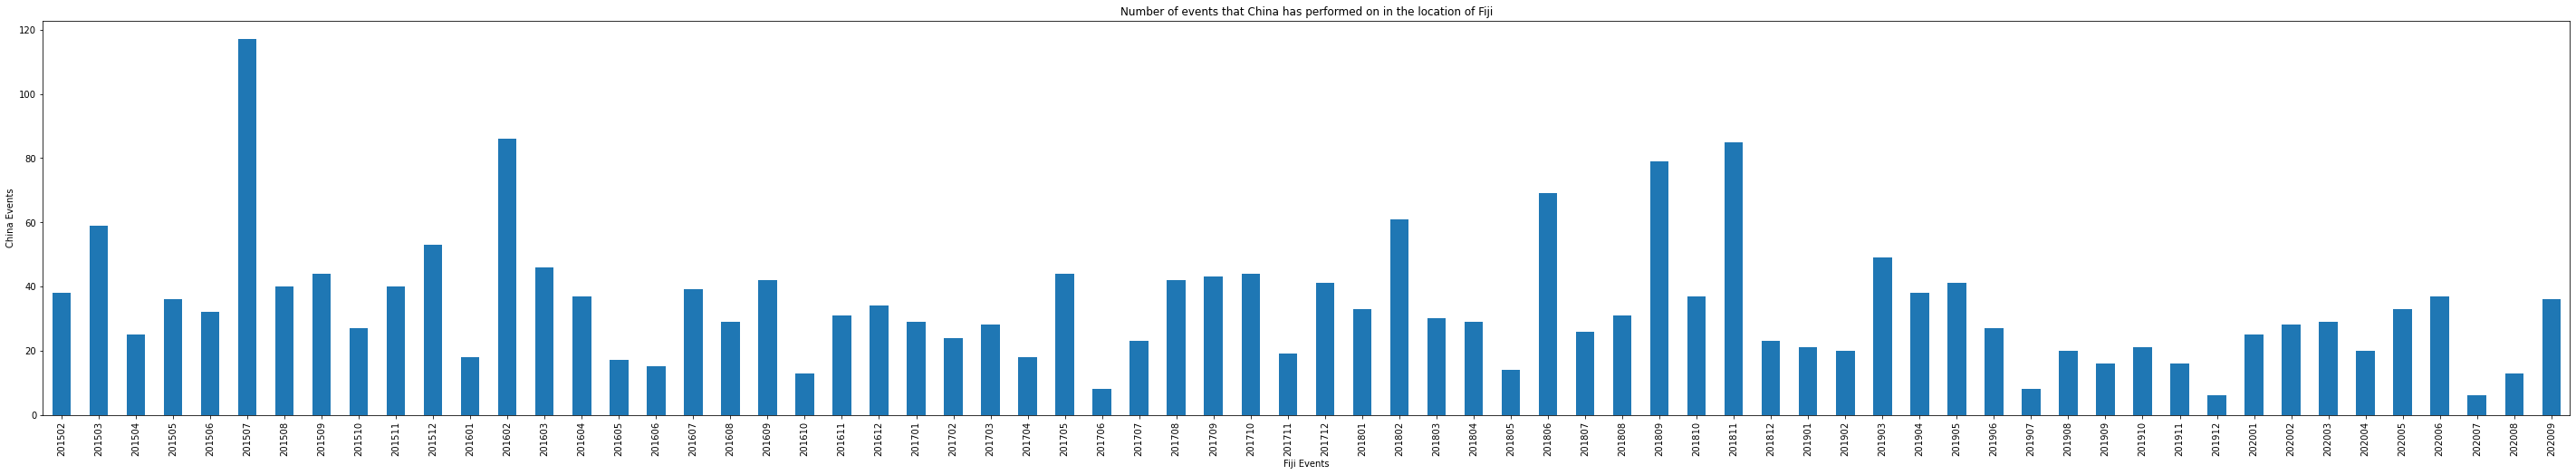

In [32]:
num_of_events_by_month('Fiji', 'China')